In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Define Time Series based on Annual frequency 

In [2]:
# Define data --- Oil production in Saudi Arabia from 1996 to 2007
data = [446.6565, 454.4733, 455.663, 423.6322, 456.2713, 440.5881, 425.3325, 485.1494, 506.0482, 526.792, 514.2689, 494.211]

In [3]:
data

[446.6565,
 454.4733,
 455.663,
 423.6322,
 456.2713,
 440.5881,
 425.3325,
 485.1494,
 506.0482,
 526.792,
 514.2689,
 494.211]

In [4]:
# Define a fixed frequency 'DatetimeIndex' corresponding to data
index= pd.date_range(start='1996', end='2008', freq='A')

In [5]:
index

DatetimeIndex(['1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [6]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
# Time series Data
oildata = pd.Series(data, index)

In [8]:
type(oildata)

pandas.core.series.Series

In [9]:
oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

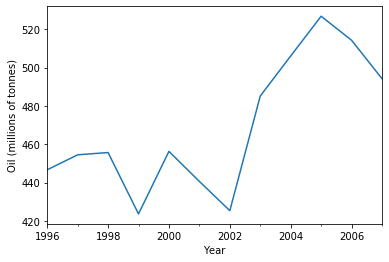

Oil production in Saudi Arabia from 1996 to 2007.


In [10]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Oil production in Saudi Arabia from 1996 to 2007.")

In [11]:
# Moving Average Method
oildata.rolling(window=2).mean()

1996-12-31          NaN
1997-12-31    450.56490
1998-12-31    455.06815
1999-12-31    439.64760
2000-12-31    439.95175
2001-12-31    448.42970
2002-12-31    432.96030
2003-12-31    455.24095
2004-12-31    495.59880
2005-12-31    516.42010
2006-12-31    520.53045
2007-12-31    504.23995
Freq: A-DEC, dtype: float64

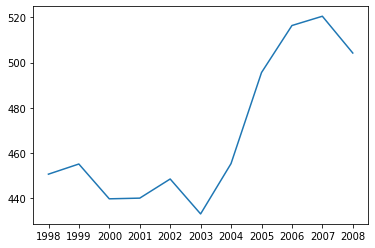

In [12]:
plt.plot(oildata.rolling(window=2).mean())

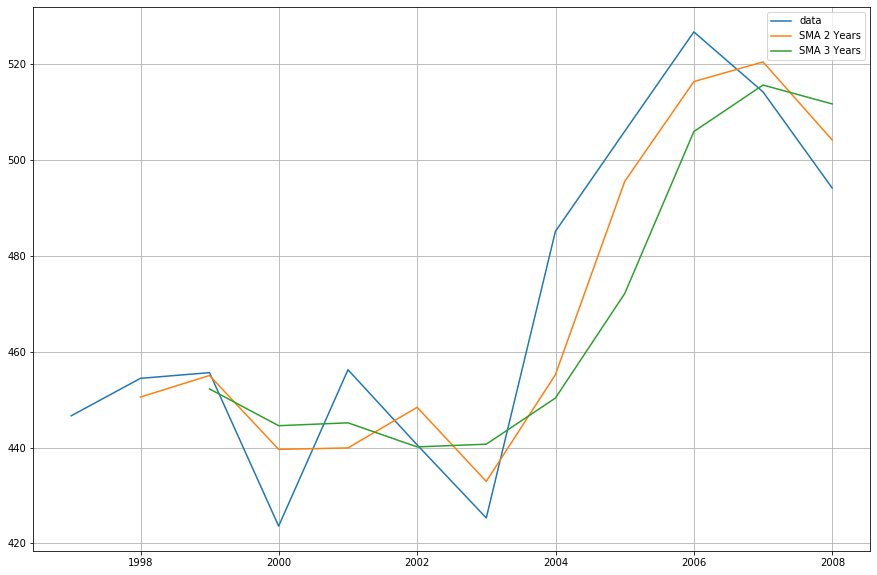

In [13]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(oildata,label='data')
plt.plot(oildata.rolling(window=2).mean(),label='SMA 2 Years')
plt.plot(oildata.rolling(window=3).mean(),label='SMA 3 Years')
plt.legend(loc=1)

## Exponential smoothing Models

### Simple Exponential Smoothing

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [15]:
# Simple Exponential Smoothing Method --- with Alpha = 0.20
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)

In [16]:
# Fitted Values
fit1.fittedvalues

1996-12-31    446.656500
1997-12-31    446.656500
1998-12-31    448.219860
1999-12-31    449.708488
2000-12-31    444.493230
2001-12-31    446.848844
2002-12-31    445.596695
2003-12-31    441.543856
2004-12-31    450.264965
2005-12-31    461.421612
2006-12-31    474.495690
2007-12-31    482.450332
Freq: A-DEC, dtype: float64

In [17]:
# Model Parameters 
fit1.params

{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 446.6565,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
# Model Parameters (Formated form)
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2000,False
initial_level,l.0,446.6565,False


In [19]:
# Model Selection Criteria (AIC, AICc, BIC)
fit1.aic, fit1.aicc, fit1.bic

(87.27855942014656, 92.99284513443227, 88.24837271972257)

In [20]:
# Predction for next Three Years
fcast1 = fit1.forecast(3)
fcast1

2008-12-31    484.802465
2009-12-31    484.802465
2010-12-31    484.802465
Freq: A-DEC, dtype: float64

In [21]:
# Simple Exponential Smoothing Method --- with Alpha = 0.60
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3)
fcast2

2008-12-31    501.837454
2009-12-31    501.837454
2010-12-31    501.837454
Freq: A-DEC, dtype: float64

In [22]:
# Model Selection Criteria (AIC, AICc, BIC)
fit2.aic, fit2.aicc, fit2.bic

(82.17442055451755, 87.88870626880326, 83.14423385409356)

In [23]:
# Simple Exponential Smoothing Method --- with optimized Alpha value automatically computed by the Statsmodels library 
fit3 = SimpleExpSmoothing(oildata).fit()

C:\Users\Hakeem-Ur-Rehman\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [26]:
# Model Selection Criteria (AIC, AICc, BIC)
fit3.aic, fit3.aicc, fit3.bic

(81.36993061588913, 87.08421633017484, 82.33974391546514)

In [27]:
# Compare Model-1, 2 and 3 based on AIC, AICc, and BIC
model1fit = fit1.aic,fit1.aicc,fit1.bic
model2fit = fit2.aic,fit2.aicc,fit2.bic
model3fit = fit3.aic,fit3.aicc,fit3.bic

results=(pd.DataFrame(index=["AIC","AICc","BIC"] ,columns=['Model-1', "Model-2","Model-3"]))
results["Model-1"] = model1fit
results["Model-2"] = model2fit
results["Model-3"] = model3fit
results

,Model-1,Model-2,Model-3
AIC,87.278559,82.174421,81.369931
AICc,92.992845,87.888706,87.084216
BIC,88.248373,83.144234,82.339744


In [28]:
# Predction for next Three Years
fcast3 = fit3.forecast(3)
fcast3

2008-12-31    496.493522
2009-12-31    496.493522
2010-12-31    496.493522
Freq: A-DEC, dtype: float64

In [29]:
# Model Parameters
fit3.params

{'smoothing_level': 0.891998783502451,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 447.47844861290974,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
# Accessing the Value of Alpha
fit3.params['smoothing_level']

0.891998783502451

### Simple Exponential Smoothing Methods: Graphical Comparison

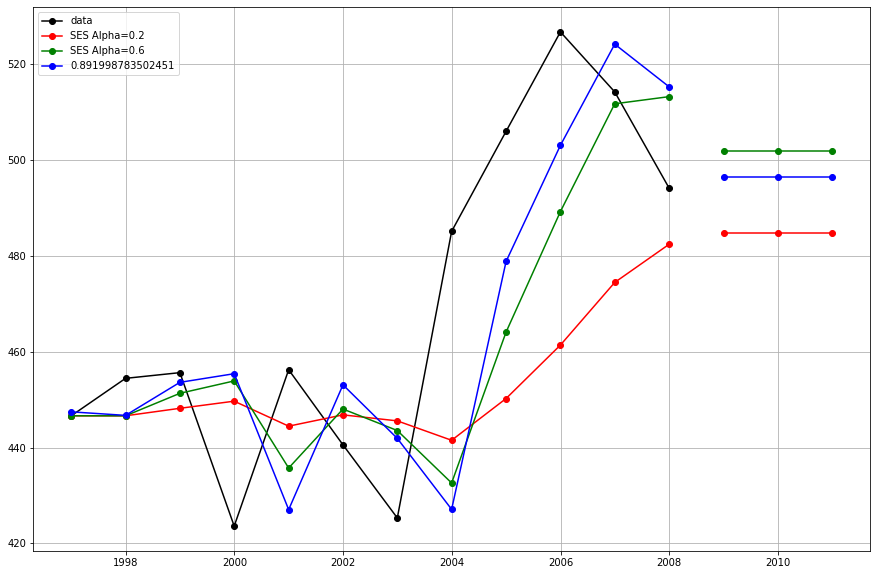

In [31]:
plt.figure(figsize=[15,10])
plt.grid(True)
# Actucal data
plt.plot(oildata,label='data',color='black',marker='o')

# SES with Alpha = 0.2
plt.plot(fcast1,label='SES Alpha=0.2',color='red',marker='o')
plt.plot(fit1.fittedvalues,color='red',marker='o')

# SES with Alpha = 0.6
plt.plot(fcast2,label='SES Alpha=0.6',color='green',marker='o')
plt.plot(fit2.fittedvalues,color='green',marker='o')

# SES with Optimum Alpha 
plt.plot(fcast3,label=fit3.params['smoothing_level'],color='blue',marker='o')
plt.plot(fit3.fittedvalues,color='blue',marker='o')

plt.legend(loc=2)

### Holt’s Method

In [32]:
# Air pollution data
data = [17.55, 21.86, 23.89, 26.93, 26.8885, 28.83, 30.0751, 30.9535, 30.1857, 31.5797, 32.5776, 33.4774, 39.0216, 41.39, 41.60]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

In [33]:
air

1990-12-31    17.5500
1991-12-31    21.8600
1992-12-31    23.8900
1993-12-31    26.9300
1994-12-31    26.8885
1995-12-31    28.8300
1996-12-31    30.0751
1997-12-31    30.9535
1998-12-31    30.1857
1999-12-31    31.5797
2000-12-31    32.5776
2001-12-31    33.4774
2002-12-31    39.0216
2003-12-31    41.3900
2004-12-31    41.6000
Freq: A-DEC, dtype: float64

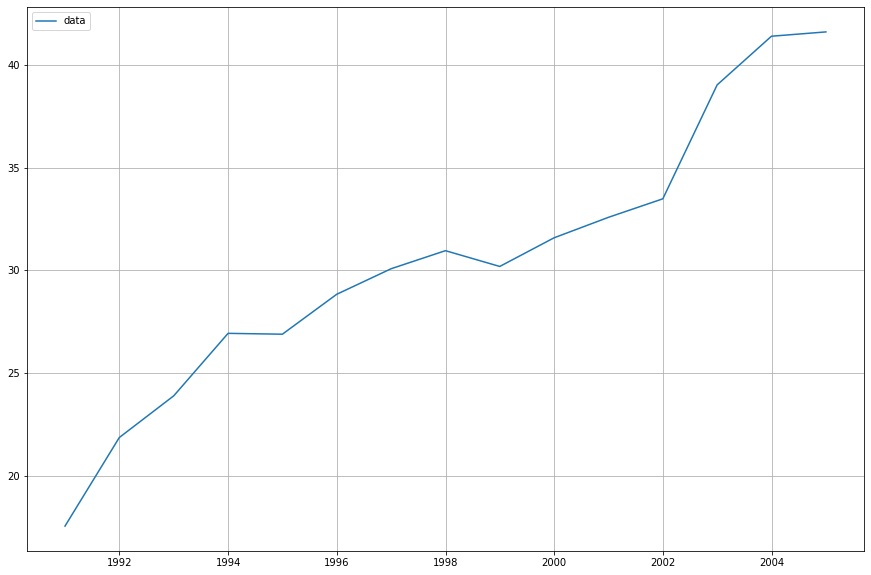

In [34]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(air,label='data')
plt.legend(loc=2)

#### Linear trend

In [35]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

In [36]:
fit1.fittedvalues

1990-12-31    21.860000
1991-12-31    22.032400
1992-12-31    25.487296
1993-12-31    27.546708
1994-12-31    30.291917
1995-12-31    30.263212
1996-12-31    31.581357
1997-12-31    32.600065
1998-12-31    33.243076
1999-12-31    32.268258
2000-12-31    33.078325
2001-12-31    33.958543
2002-12-31    34.777443
2003-12-31    40.055649
2004-12-31    43.219506
Freq: A-DEC, dtype: float64

In [37]:
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2005-12-31    43.761156
2006-12-31    45.598412
2007-12-31    47.435667
2008-12-31    49.272922
2009-12-31    51.110177
Freq: A-DEC, Name: Holt's linear trend, dtype: float64

#### Exponential trend

In [38]:
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)

In [39]:
fit2.fittedvalues

1990-12-31    21.860000
1991-12-31    22.210222
1992-12-31    26.387264
1993-12-31    28.902168
1994-12-31    32.026681
1995-12-31    31.880298
1996-12-31    33.105932
1997-12-31    33.996316
1998-12-31    34.471454
1999-12-31    33.229940
2000-12-31    33.886502
2001-12-31    34.658198
2002-12-31    35.386837
2003-12-31    40.855880
2004-12-31    44.136417
Freq: A-DEC, dtype: float64

In [40]:
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2005-12-31    44.603554
2006-12-31    47.247812
2007-12-31    50.048831
2008-12-31    53.015904
2009-12-31    56.158877
Freq: A-DEC, Name: Exponential trend, dtype: float64

#### Additive damped trend

In [43]:
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

In [44]:
fcast3

2005-12-31    42.847478
2006-12-31    43.814312
2007-12-31    44.662923
2008-12-31    45.407768
2009-12-31    46.061534
Freq: A-DEC, Name: Additive damped trend, dtype: float64

In [45]:
# Holt's Method: Compare Model-1, 2 and 3 based on AIC, AICc, and BIC
model1fit = fit1.aic,fit1.aicc,fit1.bic
model2fit = fit2.aic,fit2.aicc,fit2.bic
model3fit = fit3.aic,fit3.aicc,fit3.bic

results=(pd.DataFrame(index=["AIC","AICc","BIC"] ,columns=['Model-1', "Model-2","Model-3"]))
results["Model-1"] = model1fit
results["Model-2"] = model2fit
results["Model-3"] = model3fit
results

,Model-1,Model-2,Model-3
AIC,31.710407,40.054227,25.241010
AICc,42.210407,50.554227,41.241010
BIC,34.542608,42.886428,28.781261


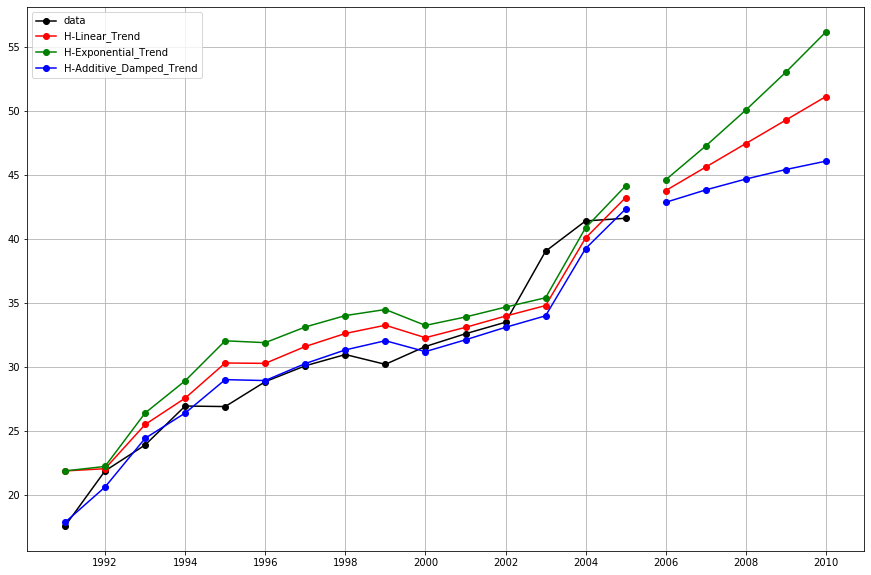

In [46]:
plt.figure(figsize=[15,10])
plt.grid(True)
# Actucal data
plt.plot(air,label='data',color='black',marker='o')

# Holt's Linear Trend
plt.plot(fcast1,label='H-Linear_Trend',color='red',marker='o')
plt.plot(fit1.fittedvalues,color='red',marker='o')

# Holt's exponential Trend
plt.plot(fcast2,label='H-Exponential_Trend',color='green',marker='o')
plt.plot(fit2.fittedvalues,color='green',marker='o')

# Holt's additive damped trend
plt.plot(fcast3,label='H-Additive_Damped_Trend',color='blue',marker='o')
plt.plot(fit3.fittedvalues,color='blue',marker='o')

plt.legend(loc=2)

### Holt’s Winters Seasonal

In [47]:
# International visitors in Australia 
data = ([41.7275, 24.0418, 32.3281, 37.3287, 46.2132, 29.3463, 36.4829, 42.9777, 48.9015, 31.1802, 37.7179, 40.4202, 51.2069, 
         31.8872, 40.9783, 43.7725, 55.5586, 33.8509, 42.0764, 45.6423, 59.7668, 35.1919, 44.3197, 47.9137])
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

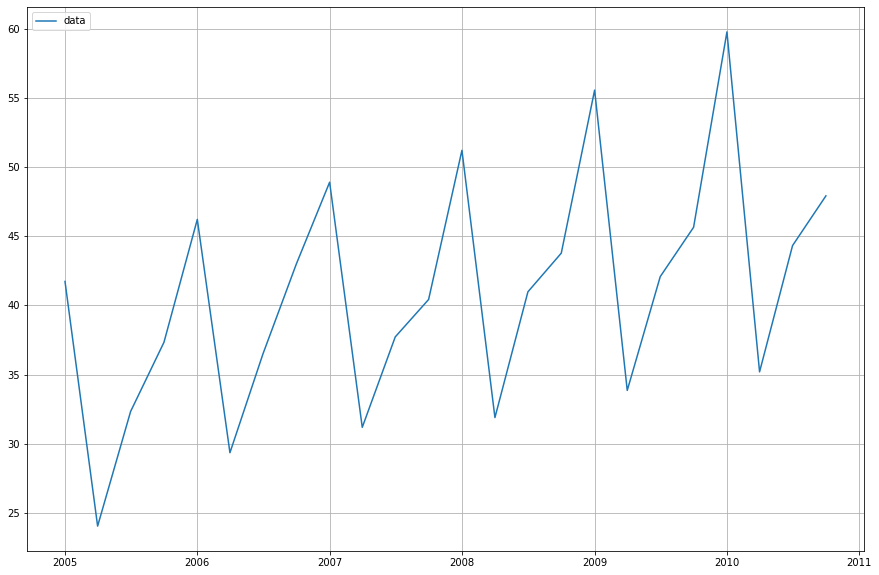

In [48]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(aust,label='data')
plt.legend(loc=2)

In [77]:
# Fit the Holt’s Winters Seasonal: 4 different models 
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit()

C:\Users\Hakeem-Ur-Rehman\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Hakeem-Ur-Rehman\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Hakeem-Ur-Rehman\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Hakeem-Ur-Rehman\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [78]:
fit1.params

{'smoothing_level': 0.42105262945073446,
 'smoothing_slope': 0.24694218446811395,
 'smoothing_seasonal': 0.5789473662928398,
 'damping_slope': nan,
 'initial_level': 49.1431006760695,
 'initial_slope': 1.0307091246805287,
 'initial_seasons': array([ -8.22787461, -26.51839342, -19.01398968, -14.4826371 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
# Models parameters and Model selection
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE", "AIC","BIC"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Model-1"] = [fit1.params[p] for p in params] + [fit1.sse] + [fit1.aic] + [fit1.bic]
results["Model-2"] = [fit2.params[p] for p in params] + [fit2.sse] + [fit2.aic] + [fit2.bic]
results["Model-3"] = [fit3.params[p] for p in params] + [fit3.sse] + [fit3.aic] + [fit3.bic]
results["Model-4"] = [fit4.params[p] for p in params] + [fit4.sse] + [fit4.aic] + [fit4.bic]
results

,Model-1,Model-2,Model-3,Model-4
$\alpha$,0.421053,9.527031e-15,0.368421,6.471535e-11
$\beta$,0.246942,4.890867e-23,0.046726,3.177382e-18
$\phi$,NaN,NaN,0.841068,9.662586e-01
$\gamma$,0.578947,1.732943e-11,0.631579,2.512844e-14
$l_0$,49.143101,5.056800e+01,49.383295,5.055435e+01
$b_0$,1.030709,9.129100e-01,1.087215,1.442723e+00
SSE,63.625567,3.459371e+01,68.386442,3.017845e+01
AIC,39.399078,2.477484e+01,43.130898,2.349778e+01
BIC,48.823508,3.419927e+01,53.733383,3.410027e+01


Forecasts Using Holt-Winters' method


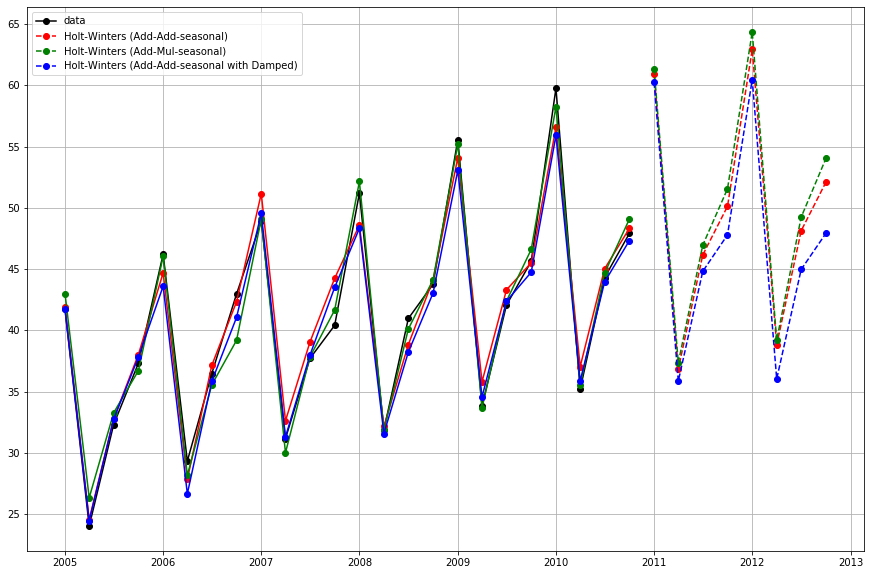

In [54]:
# Graphical Comparison of the First three Models

plt.figure(figsize=[15,10])
plt.grid(True)
# Actucal data
plt.plot(aust,label='data',color='black',marker='o')

# Model-1
plt.plot(fit1.forecast(8),label='Holt-Winters (Add-Add-seasonal)',linestyle='dashed',color='red',marker='o')
plt.plot(fit1.fittedvalues,color='red',marker='o')

# Model-2
plt.plot(fit2.forecast(8),label='Holt-Winters (Add-Mul-seasonal)',linestyle='dashed',color='green',marker='o')
plt.plot(fit2.fittedvalues,color='green',marker='o')

# Model-3
plt.plot(fit3.forecast(8),label='Holt-Winters (Add-Add-seasonal with Damped)',linestyle='dashed',color='blue',marker='o')
plt.plot(fit3.fittedvalues,color='blue',marker='o')

print("Forecasts Using Holt-Winters' method")

plt.legend(loc=2)

## Installing Prophet (Facebook’s Prophet for Time Series Forecasting)

In [55]:
# pip install fbprophet
# conda install -c conda-forge fbprophet

### Import the Facebook’s Prophet libraries

In [83]:
from fbprophet import Prophet

In [84]:
# Read the Data
sales = pd.read_csv('D:/Talks & Teaching/PSIE/Time Series Forecasting Using Python/retail_sales.csv')

In [85]:
sales.head()

,ds,y
0,1/1/1992,146376
1,2/1/1992,147079
2,3/1/1992,159336
3,4/1/1992,163669
4,5/1/1992,170068


In [86]:
sales.tail()

,ds,y
288,1/1/2016,400928
289,2/1/2016,413554
290,3/1/2016,460093
291,4/1/2016,450935
292,5/1/2016,471421


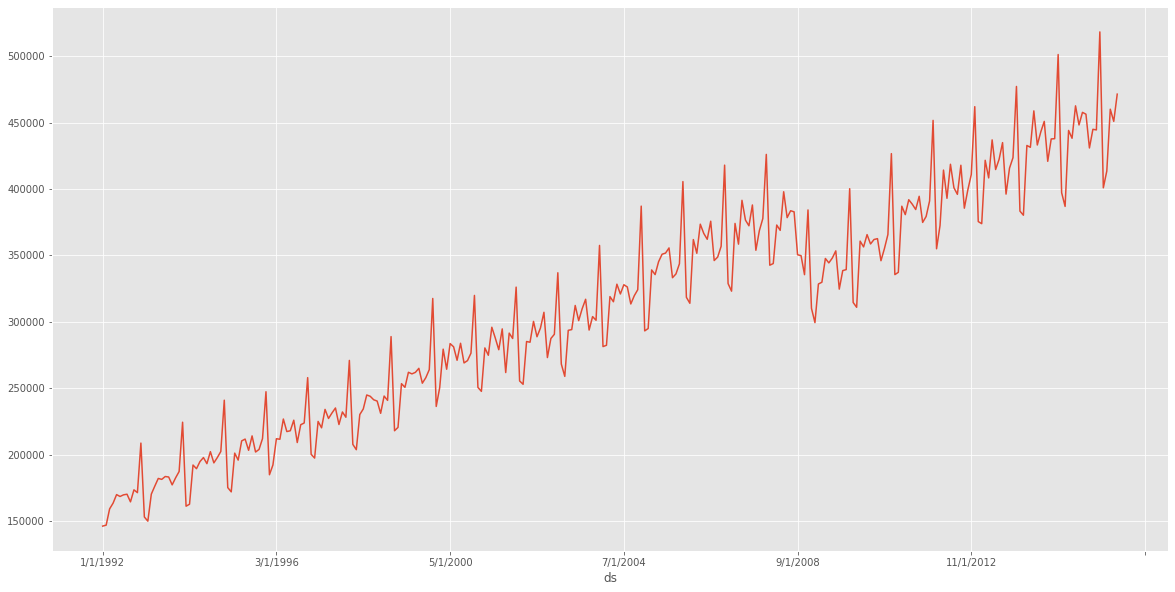

In [87]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
sales.set_index('ds').y.plot()

In [93]:
# Running the Prophet for model fitting 
model = Prophet()
model.fit(sales);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True).fit(sales)

In [95]:
# Create a data frame for predicted values
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
312,2017-12-31
313,2018-01-31
314,2018-02-28
315,2018-03-31
316,2018-04-30


In [96]:
forecast = model.predict(future)

In [97]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
312,2017-12-31,477298.420143,438549.778529,460227.616743,471663.525696,481749.236330,-27495.222258,-27495.222258,-27495.222258,13475.975296,...,-4792.943399,-4792.943399,-4792.943399,-36178.254155,-36178.254155,-36178.254155,0.0,0.0,0.0,449803.197885
313,2018-01-31,478722.788528,456044.664770,478115.866295,472706.992584,483565.479676,-11122.056256,-11122.056256,-11122.056256,13475.975296,...,2209.999936,2209.999936,2209.999936,-26808.031488,-26808.031488,-26808.031488,0.0,0.0,0.0,467600.732272
314,2018-02-28,480009.314810,478162.379266,501198.718015,473764.678177,485240.286127,10623.763737,10623.763737,10623.763737,13475.975296,...,2209.999936,2209.999936,2209.999936,-5062.211495,-5062.211495,-5062.211495,0.0,0.0,0.0,490633.078548
315,2018-03-31,481433.683194,475108.109057,498357.392709,474498.894503,487158.014653,5049.879269,5049.879269,5049.879269,13475.975296,...,-2442.455964,-2442.455964,-2442.455964,-5983.640062,-5983.640062,-5983.640062,0.0,0.0,0.0,486483.562463
316,2018-04-30,482812.104211,497397.138448,521354.002884,475595.718242,489061.279295,26429.734397,26429.734397,26429.734397,13475.975296,...,-330.785012,-330.785012,-330.785012,13284.544113,13284.544113,13284.544113,0.0,0.0,0.0,509241.838608


In [98]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
312,2017-12-31,449803.197885,438549.778529,460227.616743
313,2018-01-31,467600.732272,456044.664770,478115.866295
314,2018-02-28,490633.078548,478162.379266,501198.718015
315,2018-03-31,486483.562463,475108.109057,498357.392709
316,2018-04-30,509241.838608,497397.138448,521354.002884


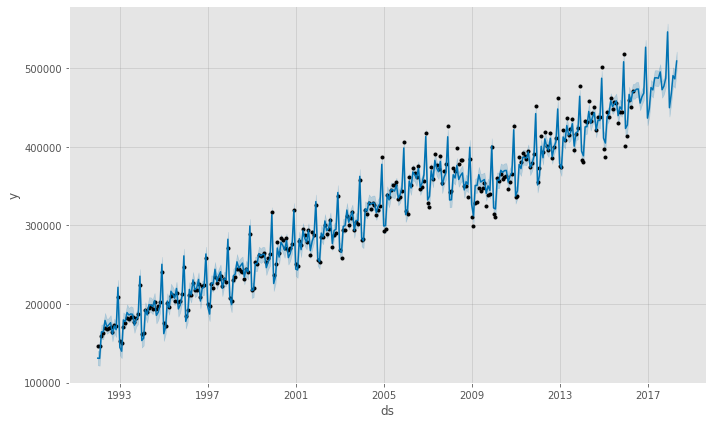

In [99]:
# original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).
model.plot(forecast);

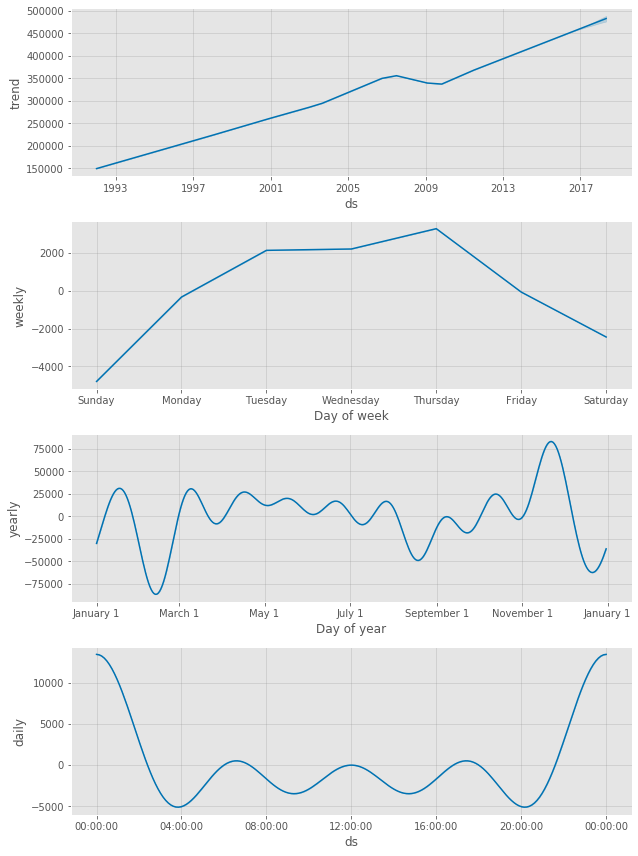

In [71]:
fig = model.plot_components(forecast)